##The dataset contains the following columns##
Transaction ID
Date
Product Category
Product Name
Units Sold
Unit Price
Total Revenue
Region
Payment Method


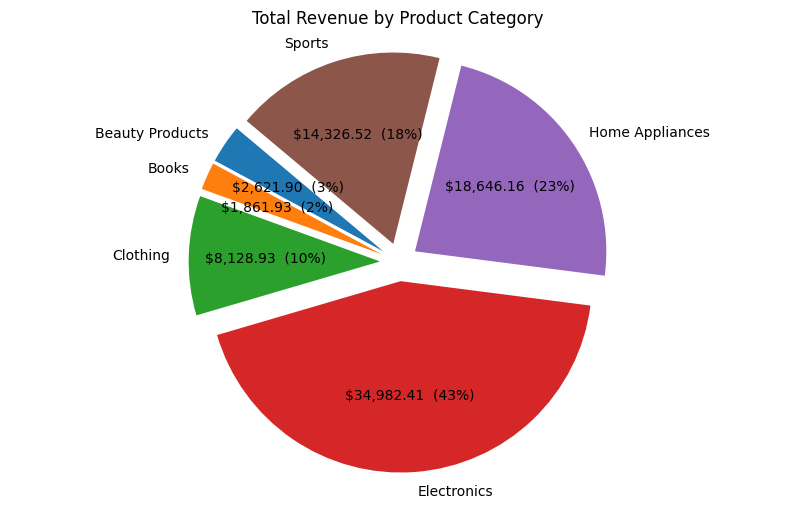

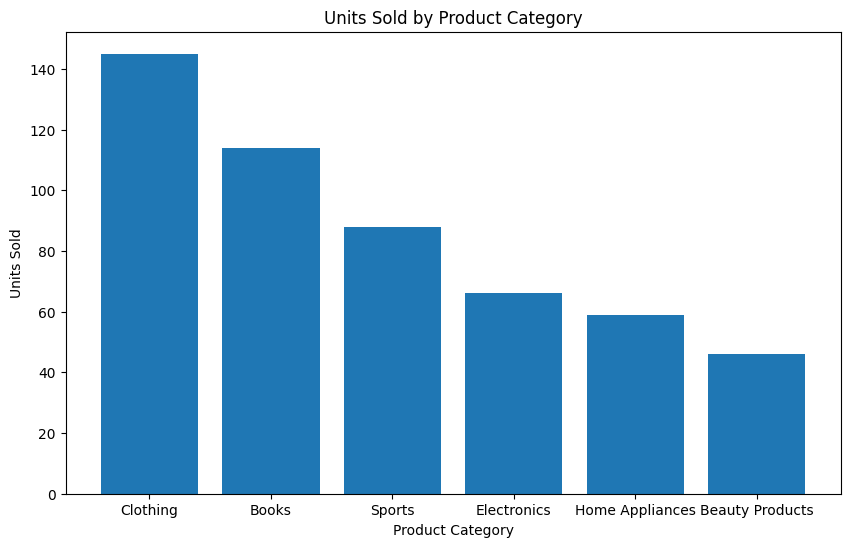

/var/folders/_8/2rrqpztn6dvglwy88vdcvbgc0000gn/T/ipykernel_5346/1705022979.py:71: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_pivot_table = pivot_table.applymap(lambda x: f"${x:,.0f}")


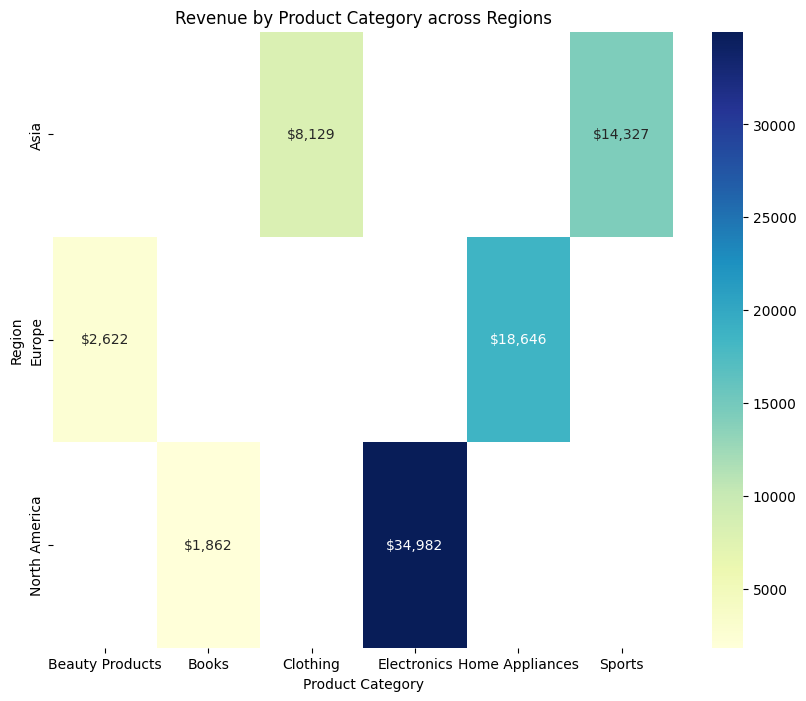

In [2]:
### Jensen Kaplan
## Using a trending kaggle dataset as a playground to display
## analytical skills and data visualization techniques
## ORIGINAL SOURCE: https://www.kaggle.com/datasets/sahilprajapati143/retail-analysis-large-dataset/code

import matplotlib.pyplot as plt
import pandas as pd
import  numpy as np
import seaborn as sns

# Function to calculate the absolute value of the percentage
# Used to display the total revenue for each category
def absolute_value_rev(val, total):
    return f'${val * total / 100:,.2f}  ({val:,.0f}%)'

# Load the dataset
df = pd.read_csv('Online Sales Data.csv')

# Print column names to explore the parameters of the dataset
print('##The dataset contains the following columns##')
for i in df.columns:
    print(i)


# Group by 'Product Category' and sum the 'Total Revenue'
revenue_by_category = df.groupby('Product Category')['Total Revenue'].sum()
# print(revenue_by_category)

# Calculate explode values - a small value for each category to explode them slightly
explode_values = [0.1] * len(revenue_by_category)  # Adjust 0.1 to increase or decrease the explosion distance


# Create the pie chart dispalaying total revenue by product category
plt.figure(figsize=(10, 6))
total_revenue = sum(revenue_by_category)
total_revenue = sum(revenue_by_category)
plt.pie(revenue_by_category, labels=revenue_by_category.index, autopct=lambda val: absolute_value_rev(val, total_revenue), startangle=140, explode=explode_values)# Adding title
plt.title('Total Revenue by Product Category')
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
# Display the chart
plt.show()

# electronics_sold = df[df['Product Category']]
electronics_sold = df[df['Product Category'] == 'Electronics']['Units Sold'].sum()

# Group the data by product category and sum the units sold
counts_by_category = df.groupby('Product Category')['Units Sold'].sum()
# Sort the counts of units sold in descending order
counts_by_category = counts_by_category.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(counts_by_category.index, counts_by_category)

# Add title and labels
plt.title('Units Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')

# Display the chart
plt.show()


# Now exploring sales by region and product category
grouped_data = df.groupby(['Region', 'Product Category'])['Total Revenue'].sum().reset_index()

# Pivot the data for heatmap visualization
pivot_table = grouped_data.pivot(index="Region", columns="Product Category", values="Total Revenue")
# Convert pivot table values to formatted currency strings
formatted_pivot_table = pivot_table.applymap(lambda x: f"${x:,.0f}")

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=formatted_pivot_table, fmt="", cmap="YlGnBu")
plt.title('Revenue by Product Category across Regions')
plt.ylabel('Region')
plt.xlabel('Product Category')
plt.show()